## Assignment 5.2

#### Loadint the Reuters dataset

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

#### Decode news back to text

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

#### Encode the data

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [5]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

#### Define the model

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### Compile the model

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Setting aside validation set

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#### Training the model

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 2.6525 - accuracy: 0.5357 - val_loss: 1.8094 - val_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.4557 - accuracy: 0.7095 - val_loss: 1.3352 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0814 - accuracy: 0.7697 - val_loss: 1.1559 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8510 - accuracy: 0.8201 - val_loss: 1.0718 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6833 - accuracy: 0.8573 - val_loss: 0.9729 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5505 - accuracy: 0.8898 - val_loss: 0.9627 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4431 - accuracy: 0.9112 - val_loss: 0.9203 - val_accuracy: 0.8150
Epoch 8/20
16

#### Plotting the training and validation accuracy

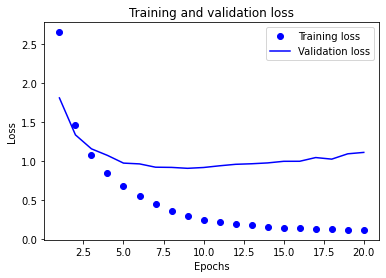

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plotting training and validation accuracy

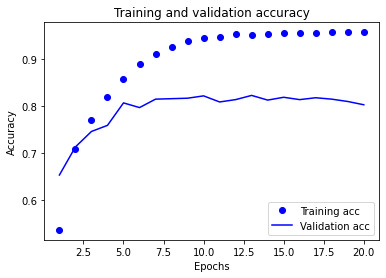

In [11]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Retrain and Fit

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/9
16/16 [==============================] - 1s 22ms/step - loss: 2.6589 - accuracy: 0.5267 - val_loss: 1.7409 - val_accuracy: 0.6450
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.4333 - accuracy: 0.7033 - val_loss: 1.3197 - val_accuracy: 0.6940
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.0628 - accuracy: 0.7638 - val_loss: 1.1362 - val_accuracy: 0.7640
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.8364 - accuracy: 0.8202 - val_loss: 1.0396 - val_accuracy: 0.7900
Epoch 5/9
16/16 [==============================] - 0s 13ms/step - loss: 0.6602 - accuracy: 0.8606 - val_loss: 0.9866 - val_accuracy: 0.7800
Epoch 6/9
16/16 [==============================] - 0s 13ms/step - loss: 0.5263 - accuracy: 0.8914 - val_loss: 0.9501 - val_accuracy: 0.7970
Epoch 7/9
16/16 [==============================] - 0s 13ms/step - loss: 0.4196 - accuracy: 0.9148 - val_loss: 0.8941 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

[0.9932986497879028, 0.7889581322669983]

In [13]:
import copy
test_labels_copy = copy.copy(test_labels)

In [14]:
np.random.shuffle(test_labels_copy)

In [15]:
hits_array=np.array(test_labels)==np.array(test_labels_copy)

In [16]:
float(np.sum(hits_array))/ len(test_labels)

0.19278717720391808

In [17]:
predictions = model.predict(x_test)

In [18]:
predictions[0].shape

(46,)

In [20]:
np.sum(predictions[0])

0.9999999

In [21]:
np.argmax(predictions[0])

3

In [22]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [23]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 2.7423 - accuracy: 0.3584 - val_loss: 2.1055 - val_accuracy: 0.3890
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.8169 - accuracy: 0.4890 - val_loss: 1.6744 - val_accuracy: 0.5960
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.4534 - accuracy: 0.6685 - val_loss: 1.4946 - val_accuracy: 0.6600
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2897 - accuracy: 0.6854 - val_loss: 1.4378 - val_accuracy: 0.6730
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1904 - accuracy: 0.7013 - val_loss: 1.4215 - val_accuracy: 0.6750
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1102 - accuracy: 0.7165 - val_loss: 1.4193 - val_accuracy: 0.6680
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0425 - accuracy: 0.7280 - val_loss: 1.4119 - val_accuracy: 0.6720
Epoch 8/20
63/63 [==